### $\color{indianred}{\text{ШЕСТА ВЈЕЖБА ИЗ АСТРОСТАТИСТИКЕ}} $

### Бајесовско статистичко закључивање

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Из Бајесове формуле слиједи једнакост:

$$
p(x,y) = p(x|y)\,p(y) = p(y|x)\,p(x).
$$

Нешто слично се користи и за пресјек:

$$
p(A\cap B) \equiv p(A,B) = p(A|B)\,p(B) = p(B|A)\,p(A).
$$

Маргинална вјероватноћа дата је преко:

$$
p(x) = \int p(x,y)\,\rm{d}y,
$$

што се даље може записати као:

$$
p(x) = \int p(x|y)\,p(y)\,\rm{d}y.
$$

Помоћу досад дефинисаних записа, долазимо до:

$$
p(y|x) = \frac{p(x|y)\,p(y)}{p(x)}
= \frac{p(x|y)\,p(y)}{\int p(x|y)\,p(y)\,dy},
$$

што је формулација Бајесовог правила.

---

Основна премиса Бајесовске методе је да тврдње о вјероватноћи нису ограничене само на податке,

већ да могу бити постављане и за сам модел и параметре модела (који се третирају као случајне 

промјењиве). Одређују се постериорне расподјеле вјероватноће, на основу приорних информација.

Бајесово правило, још једном, можемо написати као:

$$
p(M|D)=\frac{p(D|M)p(M)}{p(D)},
$$

гдје $D$ представља податке, а $M$ модел. У обзир узимамо и приорне информације ($I$) и параметре модела ($\theta$):

$$
p(M,\theta|D,I)=\frac{p(D|M,\theta,I)p(M,\theta|I)}{p(D|I)}.
$$

Бајесовско закључивање се састоји од неколико корака:

1. формулисање $p(D|M,\theta,I)$;
2. одабир $p(M,\theta|I)$;
3. одређивање постериорне функције расподјеле $p(M,\theta|D,I)$;
4. базична статистика и неодређености у моделним параметрима;
5. одабир модела који је најбоље описује податке.

Ваља напоменути да је $p(D|I)$ важно за рангирање различитих модела које имамо.

---

Закључивање би требало да буде што више "вођено" подацима, тако да нам је од интереса да узимамо тзв. 

слабо-информишуће 
приорне расподјеле. Битно нам је се поштују принципи индиферентности, инваријантности

и максималне ентропије (о чему је било ријечи на предавањима).

Хијерархијско бајесовско моделовање представља проширење класичног бајесовског приступа, у којем не само да

моделирамо параметре од интереса, већ и саме приорне расподјеле тих параметара. То постижемо тако што уводимо 

тзв. хиперпараметре, који контролишу облик приорне расподјеле (сходно томе, имамо њихове хиперприорне расподјеле).

У стандардном бајесовском моделовању, приорне расподјеле су често фиксне: нпр. нормална расподјела са унапријед 

задатом средњом вриједношћу и дисперзијом. У хијерархијском моделу, те вриједности нису фиксне већ се третирају 

као непознате величине које процјењујемо из података. Биће јасније из неког примјера везаног за астрофизику.

У потрази за егзопланетама користе се криве сјаја. Бајесовским моделовањем можемо прилагодити те криве како бисмо

добили параметре као што су орбитални период, ексцентрицитет и сл. Али често немамо много информација о вјероватним 

вриједностима тих параметара унапријед - приорне расподјеле су слабо-информишуће. Хијерархијско моделовање даје нам 

моугћност да те приорне расподјеле извучемо из самих података. Ако имамо велики број система, можемо процијенити 

како се орбитални периоди или ексцентрицитети распоређују у популацији, те добијамо не само индивидуалне параметре,

већ и демографску слику планетарних система.

---

У фреквентистичкој парадигми, значење интервала повjерења $\mu_0 \pm \sigma_\mu$ је интервал који би садржао праву вриједност

$\mu$ (из које су подаци изведени) у $68\%$ (или $X\%$) случајева великог броја замишљених поновљених експеримената 

(сваки са различитим бројем N вриједности $\{x_i\}$). Међутим, значење бајесовског региона вјеродостојности је суштински

другачије: то је интервал који садржи праву вриједност $\mu$ са вјероватноћом од $68\%$ (или $X\%$), на основу датог скупа података

(у бајесовској парадигми нема замишљених експеримената). Региони вјеродостојности нису јединствени. Можемо их 

израчунати на два различита начина:

1. интеграција од MAP (*Maximum A Posteriori*) наниже док се не обухвати $X\%$ (интервал највеће густине вјероватноће);
2. интеграција од спољних дијелова ка средини по $X/2\%$ (интервал са једнаким реповима).

---

Коначно, прелазимо на кодирање. Имамо примјер са бацањем новчића. Вјероватноћа да  падне $h$ глава у $n$ бацања дата је 

биномном расподјелом вјероватноће $p(h|\theta)=\theta^h(1-\theta)^{(n-h)}$. Ми желимо бајесовску постериорну расподјелу за добијање 

главе након одређеног броја бацања, рецимо $[5,50,500]$.


In [52]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, truncnorm, uniform, cauchy
from scipy import integrate, optimize
from astroML.plotting.mcmc import convert_to_stdev
# np.random.seed(42)

In [8]:
data = np.random.choice([0, 1], size=500, p=[0.3, 0.7])

In [9]:
len(data), np.sum(data==0), np.sum(data==1)

(500, np.int64(152), np.int64(348))

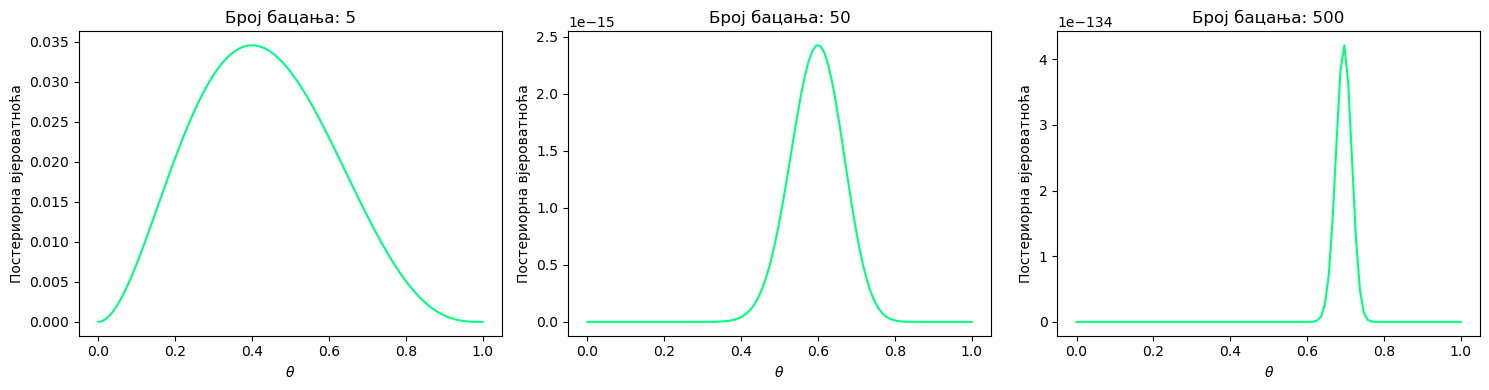

In [19]:
def p_nheads(n, h, theta):
    return (theta**h) * ((1 - theta)**(n - h))

def L(data, ntrials, theta): 
    nheads = data[:ntrials].sum()
    return p_nheads(ntrials, nheads, theta)

def prior(theta):  # униформна приорна расподјела
    return 1

theta = np.linspace(0, 1, 100)
n_trials = [5, 50, 500]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, nt in zip(axes, n_trials):
    posterior = L(data, nt, theta) * prior(theta)
    ax.plot(theta, posterior, color='springgreen')
    ax.set_title(f"Број бацања: {nt}")
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("Постериорна вјероватноћа")
plt.tight_layout()
plt.show()

Можемо искористити $\beta$ функцију за приорну, те онда имамо:

$$
p(\alpha,\beta,\theta)=\theta^{\alpha-1}(1-\theta)^{(1-\beta)}.
$$

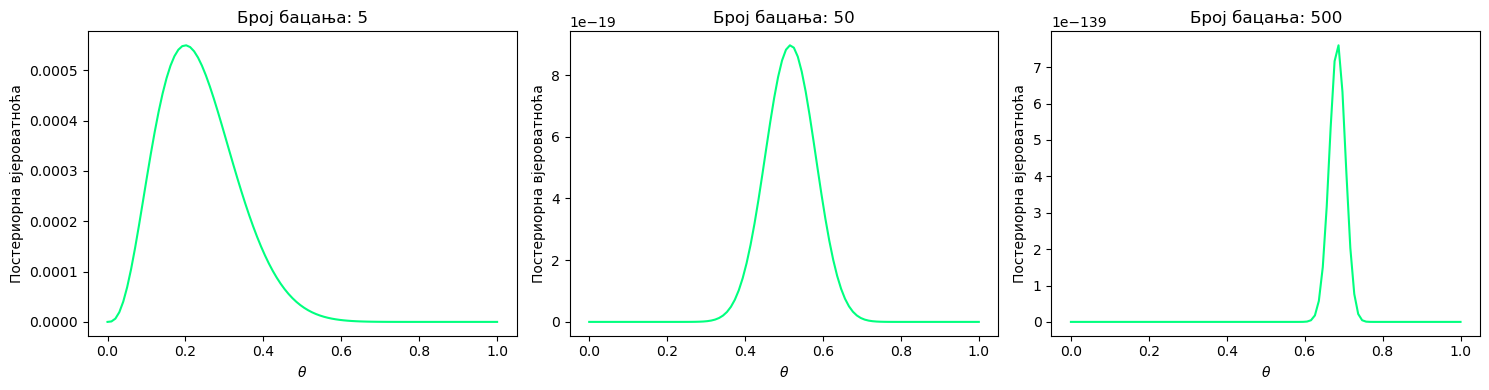

In [20]:
def prior(theta): # новчић ће бити пристраснан ка томе да падне писмо
    alpha=1 
    beta=10
    return  (theta**alpha) * ((1-theta)**(beta-1))

theta = np.linspace(0, 1, 100)
n_trials = [5, 50, 500]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, nt in zip(axes, n_trials):
    posterior = L(data, nt, theta) * prior(theta)
    ax.plot(theta, posterior, color='springgreen')
    ax.set_title(f"Број бацања: {nt}")
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("Постериорна вјероватноћа")
plt.tight_layout()
plt.show()

Случајеви са $5$ бацања се највише разликују од међусобно. Како се повећава количина података, закључивање је све

више вођено подацима, па је приорна расподјела све мање важна.

---

Размотримо случај мјерења сјаја звијезде, у коме врло добро познајемо свој телескоп. Желимо да знамо постериорну 

расподјелу вјероватноће за сјај звијезде $p(M, \theta|D, I) \equiv p(\mu|\{x_i\}, \{\sigma_i\}, I)$, тј. $\sigma_i$ је по претпоставци познато.

Од раније нам је позната сљедећа једнакост:

$$
L = p(\{x_i\}|\mu, I) = \prod_{i=1}^{N} \frac{1}{\sigma_i \sqrt{2\pi}} e^{\frac{-(x_i - \mu)^2}{2\sigma_i^2}}.
$$

У бајесовском случају, потребана нам је приорна расподјела. Можемо узети униформну расподјелу, дату као:

$$
p(\mu \mid I) = C, \quad \text{за } \mu_{\text{min}} < \mu < \mu_{\text{max}},
$$

гдје је:

$$
C = \frac{1}{\mu_{\text{max}} - \mu_{\text{min}}},
$$

а изван тог интервала, расподјела је нула. Даље имамо:

$$
\ln L = \text{const.} - \sum_{i=1}^{N} \frac{(x_i - \mu)^2}{2\sigma_i^2}.
$$

Пошто константа нема утицаја на максимум, добијамо исти резултат као и раније:

$$
\mu^0 = \frac{\sum_{i}^{N} x_i / \sigma_i^2}{\sum_{i}^{N} 1 / \sigma_i^2},\,\,\,\sigma_\mu=\Big(\sum_{i}^{N}1/\sigma_i^2\Big)^{-1/2}.
$$

Међутим, постоји случај када $\sigma$ није познато, и мора бити одређено из података. Мјере се карактеристике

звијезде и самог неба. Сада, постериорна расподјела коју тражимо није $p(\mu|\{x_i\}, \{\sigma_i\}, I)$, већ заједничка 

дводимензионална расподјела $p(\mu, \sigma \mid \{x_i\}, I)$. Слично као и раније, важи:

$$
L = p(\{x_i\}|\mu, \sigma, I) = \prod_{i=1}^{N} \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-(x_i - \mu)^2}{2\sigma^2}}.
$$

Бајесовска приорна функција је дводимензионална, и узимамо:

$$
p(\mu, \sigma | I) \propto \frac{1}{\sigma}, \quad \text{за  } \mu_{\text{min}} < \mu < \mu_{\text{max}} \text{  и  } \sigma_{\text{min}} < \sigma < \sigma_{\text{max}}.
$$

Уз правилну нормализацију, слиједи:

$$
p(\{x_i\} | \mu, \sigma, I) p(\mu, \sigma \mid I)
= C \cdot \frac{1}{\sigma^{N+1}} \prod_{i=1}^{N} e^{\frac{-(x_i - \mu)^2}{2\sigma^2}},
$$

гдје је:

$$
C = (2\pi)^{-N/2} (\mu_{\text{max}} - \mu_{\text{min}})^{-1} 
\left[ \ln\left( \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}} \right) \right]^{-1}.
$$

Даље, пишемо:

$$
\ln[p(\mu, \sigma | \{x_i\}, I)] = \text{const.} - (N + 1)\ln\sigma - \sum_{i=1}^{N} \frac{(x_i - \mu)^2}{2\sigma^2}.
$$

Претпостављена је нормална расподјела, па средња вриједност $\bar{x}$ и варијанса $V (= s^2)$ дају потпун опис.

$$
\ln[p(\mu, \sigma | \{x_i\}, I)] = \text{const.} - (N + 1)\ln\sigma - \frac{N}{2\sigma^2}((\bar{x} - \mu)^2 + V).
$$

Израз садржи само $2$ параметра које покушавамо да одредимо $(\mu, \sigma)$ и $3$ вриједности које можемо директно

одредити из података $(N, \bar{x}, V)$.

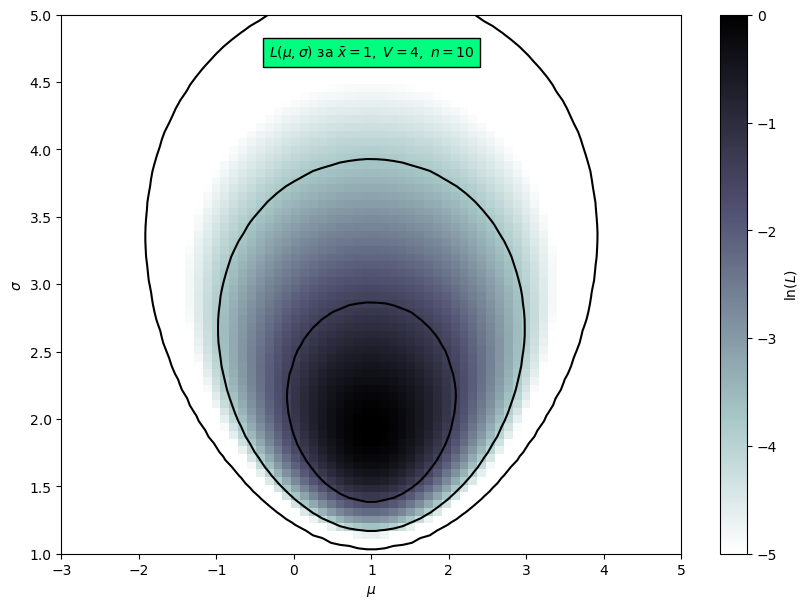

In [25]:
def gauss_logL(xbar, V, n, sigma, mu):
    return (-(n + 1) * np.log(sigma) - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

fig = plt.figure(figsize=(10, 7))
plt.imshow(logL, origin='lower', extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap='bone_r', aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$')
plt.clim(-5, 0)
plt.contour(mu, sigma, convert_to_stdev(logL), levels=(0.683, 0.955, 0.997), colors='black')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{за}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(edgecolor='black', facecolor='springgreen'),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.show()

Ако нпр. желимо $p(\mu | \{x_i\}, I)$, а не $p(\mu, \sigma | \{x_i\}, I)$, вршимо маргинализацију по $\sigma$:

$$
p(\mu | \{x_i\}, I) = \int_{0}^{\infty} p(\mu, \sigma | \{x_i\}, I)d\sigma
$$

и тако (користећи смјену $t = 1/\sigma$ и парцијалну интеграцију) добијамо:

$$
p(\mu | \{x_i\}, I) \propto \left(1 + \frac{(\bar{x} - \mu)^2}{V}\right)^{-N/2}.
$$

Овај резултат одговара Студентовој $t$-расподјели са $k = N - 1$ степена слободе за промјенљиву $t = (\bar{x} - \mu) / (s / \sqrt{N})$,

гдје је $s$ стандардна девијација узорка. Студентова $t$-расподјела је симетрична и звонастог облика, али са "тежим" 

реповима него нормална расподјела. Свакако, она прелази у нормалну за велико $N$.

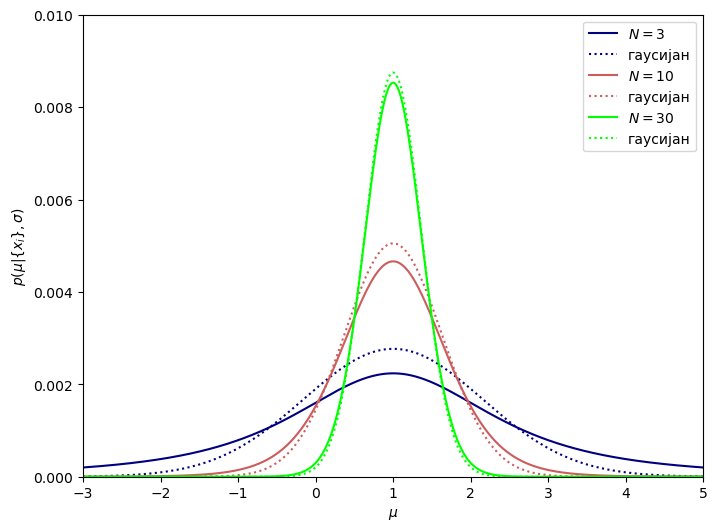

In [27]:
mu = np.linspace(-3, 5, 1000)
xbar = 1.0
V = 4.0

def compute_pmu(mu, xbar, V, N):
    p = (1 + (xbar - mu) ** 2 / V) ** (-0.5 * N)
    return p / np.sum(p)
    
N1 = 3
pmu1 = compute_pmu(mu,xbar,V,N1)
G1 = norm(xbar, np.sqrt(V/N1)).pdf(mu) 
G1norm = G1 / np.sum(G1)

N2 = 10
pmu2 = compute_pmu(mu,xbar,V,N2)
G2 = norm(xbar, np.sqrt(V/N2)).pdf(mu) 
G2norm = G2 / np.sum(G2)

N3 = 30
pmu3 = compute_pmu(mu,xbar,V,N3)
G3 = norm(xbar, np.sqrt(V/N3)).pdf(mu) 
G3norm = G3 / np.sum(G3)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(mu, pmu1, linestyle='-', color='navy', label=r'$N=3$')
plt.plot(mu, G1norm, linestyle=':', color='navy', label=r'гаусијан')
plt.plot(mu, pmu2, linestyle='-', color='indianred', label=r'$N=10$')
plt.plot(mu, G2norm, linestyle=':', color='indianred', label=r'гаусијан')
plt.plot(mu, pmu3, linestyle='-', color='lime', label=r'$N=30$')
plt.plot(mu, G3norm, linestyle=':', color='lime', label=r'гаусијан')

plt.xlim(-3, 5)
plt.ylim(0, 0.01)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(\mu | \{x_i\},\sigma)$')
plt.legend()
plt.show() 

---

Уколико вриједности које мјеримо ($\{x_i\}$) такође имају неодређености мјерења онда то исказујемо преко 

ширења интринзичног $\sigma$ и грешке мјерења података $\{e_i\}$. Уколико су неодређености хетероскедастичне

расподјела $\{x_i\}$ ће бити негаусовска: $x_i\sim\mathcal{N}(\mu,\sigma^2+e_i^2)$.

Покушавамо да пронађемо параметре $\mu$ и $\sigma$ основне расподјеле. Са униформним приорним расподјелама имамо:

$$
\ln p = \text{const.} - \frac{1}{2} \sum_{i=1}^{N} \left( \ln(\sigma^2 + e_i^2) + \frac{(x_i - \mu)^2}{\sigma^2 + e_i^2} \right),
$$

Ово можемо аналитички максимзовати да бисмо пронашли *maximum a posteriori* вриједност $\mu_0$:

$$
\mu_0 = \frac{\sum_{i=1}^{N} x_i / (\sigma_0^2 + e_i^2)}{\sum_{i=1}^{N} 1 / (\sigma_0^2 + e_i^2)}.
$$

Међутим, потпуно аналитичко рјешење за $\sigma_0$ не постоји, па користимо нумеричке методе.

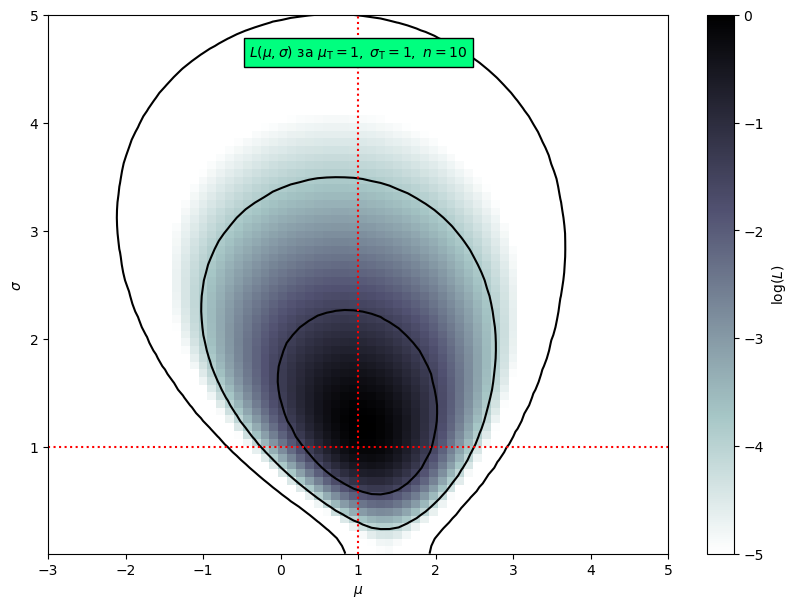

In [32]:
np.random.seed(5)

def gaussgauss_logL(xi, ei, mu, sigma):
    ndim = len(np.broadcast(sigma, mu).shape)
    xi = xi.reshape(xi.shape + tuple(ndim * [1]))
    ei = ei.reshape(ei.shape + tuple(ndim * [1]))
    s2_e2 = sigma ** 2 + ei ** 2
    return -0.5 * np.sum(np.log(s2_e2) + (xi - mu) ** 2 / s2_e2, 0)

mu_true = 1
sigma_true = 1
N = 10
ei = 3 * np.random.random(N)
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))
sigma = np.linspace(0.01, 5, 70)
mu = np.linspace(-3, 5, 70)

logL = gaussgauss_logL(xi, ei, mu, sigma[:, np.newaxis])
logL -= logL.max()

fig = plt.figure(figsize=(10, 7))
plt.imshow(logL, origin='lower', extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap='bone_r', aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.text(0.5, 0.93,
         (r'$L(\mu,\sigma)\ \mathrm{за }\ \mu_{\rm Т}=1,\ '
          r'\sigma_{\rm Т}=1,\ n=10$'),
         bbox=dict(edgecolor='black', facecolor='springgreen'),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.contour(mu, sigma, convert_to_stdev(logL), levels=(0.683, 0.955, 0.997), colors='black')

plt.axhline(mu_true, color='red', linestyle=':')
plt.axvline(sigma_true, color='red', linestyle=':')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.show()

Код заправо показује како бисмо из скупа шумовитих мјерења и познатих грешака мјерења, могли да процјенимо 
$\mu$ и $\sigma$. 

Ако се мијења *seed* добијају се другачије грешке мјерења, па самим тим и $x_i$.

---

Интересантан је случај када треба моделовати комбинацију гаусовских расподјела са униформном расподјелом.

Испод је слика везана за физику честица - Хигсов бозон је "уграђен" у позадински шум/друге честице. Ово је

приближан опис коментарисаног проблема.

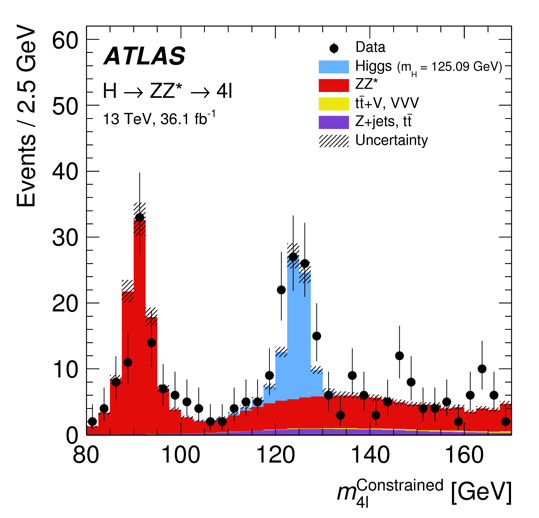

Ако претпоставимо да је параметар локације ($\mu$) познат (рецимо из теорије) и да су неодређености $x_i$ 

занемарљиве у поређењу са $\sigma$, онда имамо да се вјероватноћа добијања појединачног мјерења $x_i$ може 

написати као мјешавина или гаусовске или униформне расподјеле. Стога, користимо правило ИЛИ:

$$
p(x_i | A, \mu, \sigma, I) = \frac{A}{\sigma\sqrt{2\pi}}e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} + \frac{1 - A}{W}.
$$

Вјероватноћа позадине узета је као $0 < x < W$ и 0 иначе. $A$ и $1-A$ су релативне снаге двије компоненте,

које су очигледно антикорелисане. Ако усвојимо униформну приорну расподјелу и за $A$ и за $\sigma$ имамо:

$$
p(A, \sigma | I) = C, \text{  за  } 0 \le A < A_{\max} \text{  и  } 0 \le \sigma \le \sigma_{\max},
$$

те је онда постериорна расподјела:

$$
\ln[p(A, \sigma | \{x_i\}, \mu, W)] = \sum_{i=1}^{N} \ln\left[\frac{A}{\sigma\sqrt{2\pi}}e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} + \frac{1 - A}{W}\right].
$$

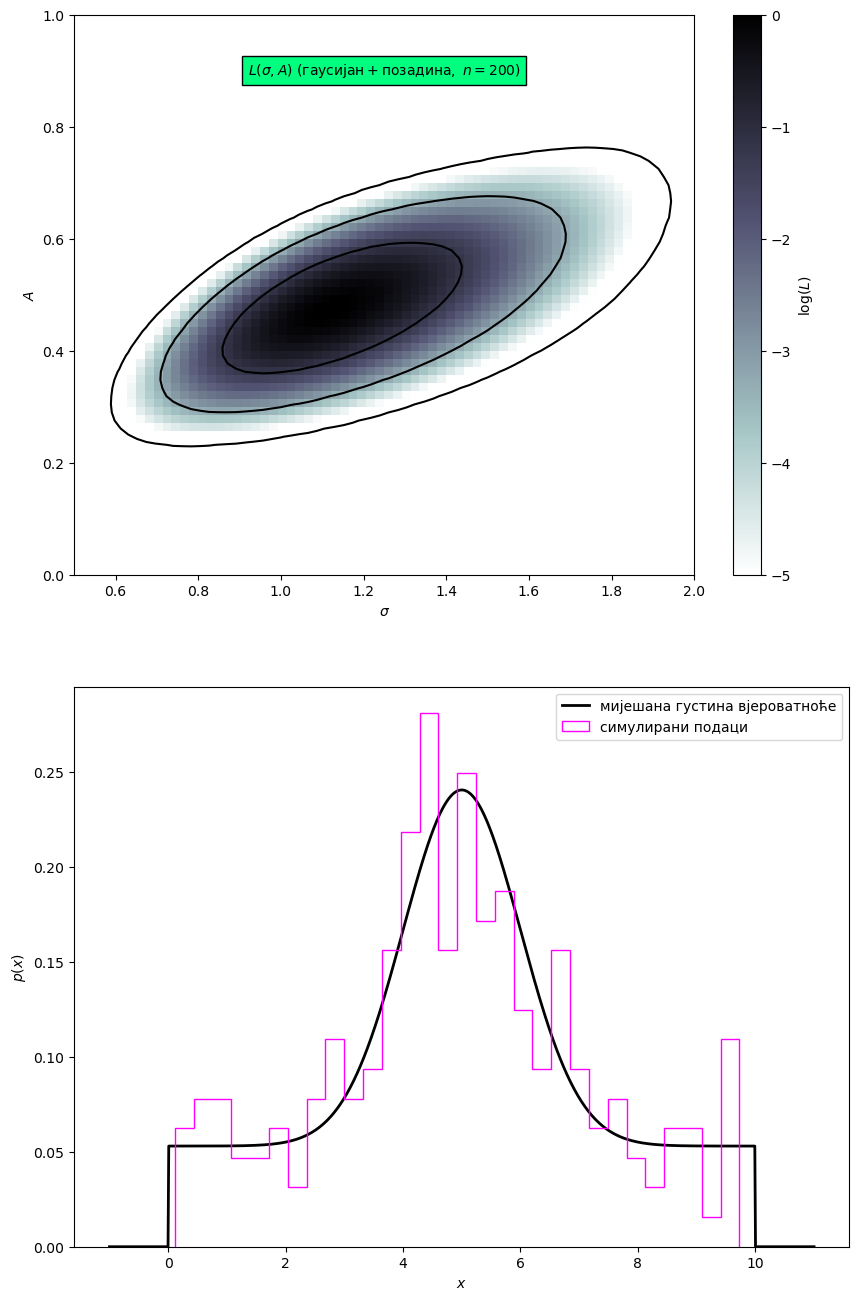

In [48]:
def gausslin_logL(xi, A=0.5, sigma=1.0, mu=5.0, L=10.0): # сваки податак има вјероватноћу која је мјешавина двије расподјеле
    
    xi = np.asarray(xi)
    shape = np.broadcast(sigma, A, mu, L).shape
    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))
    return np.sum(np.log(A * np.exp(-0.5 * ((xi - mu) / sigma) ** 2)
                         / (sigma * np.sqrt(2 * np.pi))
                         + (1. - A) / L), 0)

np.random.seed(0)
mu = 5.0
sigma = 1.0
L = 10.0
A = 0.5 # пола података из једне, пола из друге расподјеле
N = 200

xi = np.random.random(N)
NA = np.sum(xi < A) # NA узорака третирамо као гаусовске, а остале као позадину

dist1 = truncnorm((0 - mu) / sigma, (L - mu) / sigma, mu, sigma) # исјечена гаусовска расподјела
dist2 = uniform(0, 10)
xi[:NA] = dist1.rvs(NA)
xi[NA:] = dist2.rvs(N - NA)

x = np.linspace(-1, 11, 1000)
fracA = NA * 1. / N

sigma = np.linspace(0.5, 2, 70)
A = np.linspace(0, 1, 70)

logL = gausslin_logL(xi, A[:, np.newaxis], sigma)
logL -= logL.max()

fig = plt.figure(figsize=(10, 16))

plt.subplot(211)
plt.imshow(logL, origin='lower', aspect='auto', extent=(sigma[0], sigma[-1], A[0], A[-1]), cmap='bone_r')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$A$')

plt.text(0.5, 0.9, r'$L(\sigma,A)\ (\mathrm{гаусијан + позадина},\ n=200)$',
        bbox=dict(edgecolor='black', facecolor='springgreen'),
        ha='center', va='center', transform=plt.gca().transAxes)

plt.contour(sigma, A, convert_to_stdev(logL), levels=(0.683, 0.955, 0.997), colors='black')

plt.subplot(212)
plt.plot(x, fracA * dist1.pdf(x) + (1. - fracA) * dist2.pdf(x), color='black', lw=2, label='мијешана густина вјероватноће')
plt.hist(xi, 30, density=True, histtype='step', color='magenta', label='симулирани подаци')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
plt.show()

---

Поређење модела и тестирање хипотеза у бајесовском закључивању се јако разликују од фреквентистичке статистике.

Модели се сада рангирају пробабилистички, у смислу тога колико добро описују податке узевши у обзир претходна

знања. Да се подсјетимо, у фреквентистичкој статистици смо квалитетност фита "мјерили" преко вриједности $ \chi^2_{\rm dof}$ и 

фаворизовали смо што мање $\chi^2$, уз наравно, што мање комплексне моделе (низак број слободних параметара)!

Поново крећемо од Бајесове теореме:

$$
p(M, \theta | D, I) = \frac{p(D | M, \theta, I) \times p(M, \theta | I)}{p(D | I)}
$$

и маргинализујемо по простору параметара модела $\theta$ да бисмо добили вјероватноћу за модел $M$, с обзиром на 

податке $D$ и претходне информације $I$:

$$
p(M | D, I) = \int p(M, \theta | D, I) d\theta = \int \frac{p(D | M, \theta, I) p(M, \theta | I)}{p(D | I)} d\theta = \frac{p(M | I)}{p(D | I)} \int p(D | M, \theta, I) p(\theta | M, I) d\theta
$$

Да бисмо одредили који је модел бољи, израчунавамо однос постериорних вјероватноћа за два модела као:

$$
O_{21} \equiv \frac{p(M_2 | D, I)}{p(M_1 | D, I)}.
$$

Постериорна вјероватноћа да је модел $M$ исправан с обзиром на податке $D$ (вриједност између $0$ и $1$) је:

$$
p(M | D, I) = \frac{p(D | M, I) p(M | I)}{p(D | I)},
$$

и можемо занемарити $p(D | I)$ пошто ће бити исти за оба модела. Добијамо:

$$
O_{21} = \frac{p(D | M_2, I) p(M_2 | I)}{p(D | M_1, I) p(M_1 | I)} \equiv B_{21} \frac{p(M_2 | I)}{p(M_1 | I)},
$$

гдје се $B_{21}$ назива Бајесов фактор и он пореди колико добро модели одговарају подацима. Уколико нпр. два модела

фитују податке једнако добро, онда се о бољем одлучује на основу приорних расподјела. Узмимо за примјер податке за

извор који садрже шум, а једнако је вјероватно да је тај извор звијезда или галаксија. Постериорна вјероватноћа да је

извор звијезда веома зависи од тога да ли посматрамо Галактичку раван или не.

---

Можемо израчунати тзв. маргиналну вјероватноћу за модел (подаци би били посматрани ако је модел био исправан):

$$
E(M) = p(D | M, I) = \int p(D | M, \theta, I) p(\theta | M, I) d\theta.
$$

Понекад се назива бајесовски доказ (алтернативно се означава са $\mathcal{Z}$). У стандардној процјени параметара, то је оно

што се налази у имениоцу код Бајесове теореме. Ако нам је потребно $\theta$ из модела $M$, онда можемо писати:

$$
p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)}
$$

---

Постоји скала којом се могу поредити односи постериорних вјероватоћа. Нпр. ако је $O_{21} > 10$, онда то представља "јаке"

доказе у корист $M_2$ ($M_2$ је десет пута вјероватнији модел од $M_1$), а $O_{21} > 100$ је "одлучујући" доказ ($M_2$ је сто пута

вјероватнији од $M_1$). Када је $O_{21} < 3$, доказ "није вриједан ни помена". Испод је табела, за потребе илустрације.

| Бајесов фактор, $\mathcal{B}$ | $\ln(\mathcal{B})$ | Јачина доказа |
| :---------------------------- | :------------------ | :------------------- |
| $< 1 : 1$                     | $< 0$               | Негативно (подржава $\mathcal{H}_2$) |
| $1 : 1$ до $3 : 1$            | $0 - 1.1$           | Једва вриједно помена |
| $3 : 1$ до $10 : 1$           | $1.1 - 2.3$         | Значајно |
| $10 : 1$ до $30 : 1$          | $2.3 - 3.4$         | Јако |
| $30 : 1$ до $100 : 1$         | $3.4 - 4.6$         | Веома јако |
| $> 100 : 1$                   | $> 4.6$             | Одлучујуће |

---

У тестирању хипотеза у суштини поредимо модел $M_1$ са његовим комплементом. То значи да је $p(M_1) + p(M_2) = 1$. 

Ако узмемо $M_1$ за нулту хипотезу, онда се питамо да ли подаци одбацују нулту хипотезу.

- У класичном тестирању хипотеза можемо питати да ли један модел пружа добар опис података;
- У бајесовском тестирању хипотеза, морамо имати алтернативни модел за поређење.

За примјер, извлачимо узорак из Кошијеве расподјеле и вршимо бајесовско поређење модела за Кошијев и Гаусов модел. 

Резултати за првих десет података:
L(M = коши) = 1.18e-12 +/- 5.39e-16
L(M = гаус)  = 8.09e-13 +/- 7.45e-16
коши vs. гаус; однос постериорних вјероватноћа = 1.45 +/- 0.00134


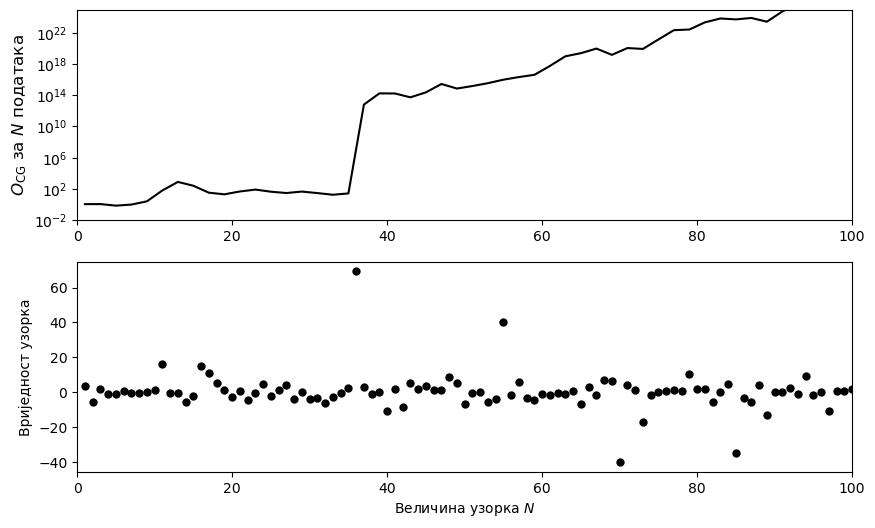

In [62]:
def logL_cauchy(xi, gamma, mu,
                mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - n * np.log(np.pi)
            + (n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))


def logL_gaussian(xi, sigma, mu,
                  mu_min=-10, mu_max=10, sigma_min=0.01, sigma_max=100):
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(sigma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    prior_normalization = - (np.log(mu_max - mu_min)
                             + np.log(np.log(sigma_max / sigma_min)))

    return (prior_normalization
            - 0.5 * n * np.log(2 * np.pi)
            - (n + 1) * np.log(sigma)
            - np.sum(0.5 * ((xi - mu) / sigma) ** 2, 0))


def calculate_odds_ratio(xi, epsrel=1E-8, epsabs=1E-15): # однос постериорних вјероватноћа

    gauss_Ifunc = lambda mu, sigma: np.exp(logL_gaussian(xi, mu, sigma))
    cauchy_Ifunc = lambda mu, gamma: np.exp(logL_cauchy(xi, mu, gamma))

    I_gauss, err_gauss = integrate.dblquad(gauss_Ifunc, -np.inf, np.inf,
                                           lambda x: 0, lambda x: np.inf,
                                           epsabs=epsabs, epsrel=epsrel)
    I_cauchy, err_cauchy = integrate.dblquad(cauchy_Ifunc, -np.inf, np.inf,
                                             lambda x: 0, lambda x: np.inf,
                                             epsabs=epsabs, epsrel=epsrel)

    if I_gauss == 0: # маргинализација параметара
        O_CG = np.inf
        err_O_CG = np.inf
    else:
        O_CG = I_cauchy / I_gauss
        err_O_CG = O_CG * np.sqrt((err_gauss / I_gauss) ** 2)

    return (I_gauss, err_gauss), (I_cauchy, err_cauchy), (O_CG, err_O_CG)

np.random.seed(44)
mu = 0
gamma = 2
xi = cauchy(mu, gamma).rvs(100)

((I_gauss, err_gauss),
 (I_cauchy, err_cauchy),
 (O_CG, err_O_CG)) = calculate_odds_ratio(xi[:10])

print("Резултати за првих десет података:")
print("L(M = коши) = %.2e +/- %.2e" % (I_cauchy, err_cauchy))
print("L(M = гаус)  = %.2e +/- %.2e" % (I_gauss, err_gauss))
print("коши vs. гаус; однос постериорних вјероватноћа = %.3g +/- %.3g" % (O_CG, err_O_CG))

Nrange = np.arange(1, 101, 2)
Odds = np.zeros(Nrange.shape)
for i, N in enumerate(Nrange):
    res = calculate_odds_ratio(xi[:N])
    Odds[i] = res[2][0]

plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(Nrange, Odds, color='black')
plt.ylabel(r'$O_\mathrm{CG}$ за $N$ података', fontsize=12)
plt.xlim(0, 100)
plt.yscale('log')
plt.ylim(1e-2, 1e25)

plt.subplot(212)
plt.scatter(np.arange(1, len(xi) + 1), xi, lw=0, color='black')
plt.xlim(0, 100)
plt.xlabel('Величина узорка $N$')
plt.ylabel('Вриједност узорка')
plt.show() 

---

Са графика изнад се види да што имамо више података, то Кошијев модел боље објашњава податке од Гаусовог. Репови

у Кошијевог расподјели добро хватају екстремне вриједности. Бајесовска анализа то ухвати кроз маргинализацију 

параметара и изражава који модел глобално боље објашњава податке. Однос постериорних вјероватноћа расте и достиже

вриједности попут $10^{24}$ што значи да се Гаусов модел одбацује.

---

Погледајмо примjер користећи бацање новчића. Претпоставимо да имамо $N$ извлачења и $k$ су "успjеси" (рецимо, главе).

Поредићемо двије хипотезе:

- $M_1$: Новчић има познату вјероватноћу за главу $b_*$ (рецимо, поштен новчић са $b_*=0.5$), са приорном вјероватноћом

датом са делта функцијом, $\delta(b - b_*)$;

- $M_2$: Вјероватноћа за главу, $b$, је непозната, са униформном приорном расподјелом у опсјегу ($0,1$). Новчић није фер.

Модел који нам је потребан (параметризован вјероватноћом успјеха $b$, са $k$ успјеха) је биномна расподјела:

$$
p(k | b, N) = \frac{N!}{k!(N - k)!} b^k (1 - b)^{N - k}.
$$

За модел $M_2$, нема модификације формуле, али за модел $M_1$, имаћемо:

$$
p(k | b_*, N, M_1) p(b | M_1, I) = \frac{N!}{k!(N - k)!} b_*^k (1 - b_*)^{N - k}.
$$

Сада однос постериорних вјероватноћа пишемо као:

$$
O_{21} = \int_{0}^{1} \left(\frac{b}{b_*}\right)^k \left(\frac{1 - b}{1 - b_*}\right)^{N - k} db,
$$

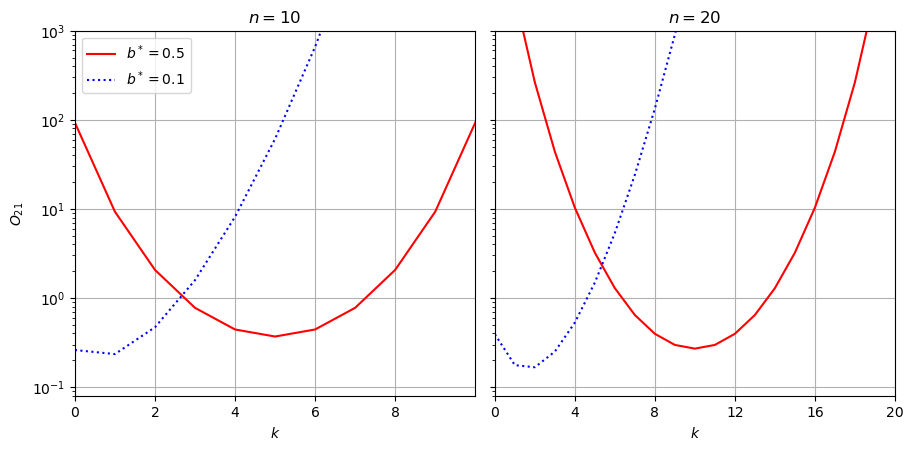

In [66]:
@np.vectorize # скаларна функција постаје аrray-compatible

def odds_ratio(n, k, bstar):
    factor = 1. / (bstar ** k * (1 - bstar) ** (n - k))
    f = lambda b: b ** k * (1 - b) ** (n - k)
    return factor * integrate.quad(f, 0, 1)[0]

plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.13, right=0.95, wspace=0.05, bottom=0.15)

subplots = [121, 122]
n_array = [10, 20]
linestyles = ['-r', ':b'] # згодније ознаке за овај примјер
bstar_array = [0.5, 0.1]

for subplot, n in zip(subplots, n_array):
    plt.subplot(subplot)
    plt.yscale('log')
    k = np.arange(n + 1)

    for ls, bstar in zip(linestyles, bstar_array):
        plt.plot(k, odds_ratio(n, k, bstar), ls, label=r'$b^* = %.1f$' % bstar)

    if subplot == 121:
        plt.xlim(0, n - 0.01)
        plt.ylabel(r'$O_{21}$')
        plt.legend(loc=2)
    else:
        plt.xlim(0, n)
        plt.gca().yaxis.set_major_formatter(plt.NullFormatter())

    plt.xlabel('$k$')
    plt.title(f'$n = {n}$')
    plt.ylim(8E-2, 1E3)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(n / 5))
    plt.grid()

plt.show()

---

Изнад је приказано понашање $O_{21}$ као функције $k$ за двије различите вриједности $N$ и за двије различите 

вриједности $b_*$: $b_*=0.5$ ($M_1$: новчић је поштен) и $b_*=0.1$ ($M_1$: новчић је пристрасан према писму).

Способност разликовања двије хипотезе побољшава се са величином узорка. Фаворизује се једноставнији модел.

- $O_{21} = \sqrt{\pi / (2N)}$ када је $k=b_*N$ и $b_*=0.5$;
- да би се изградио јак доказ да је новчић поштен, $O_{21} < 0.1$, потребно је чак $N > 157$ бацања;
- са $N=10,000$, вјероватноћа главе поштеног новчића се мјери са прецизношћу од $1\%$, а имамо $O_{21} \approx 1/80$.

Још једном, да закључимо: у фреквентистичком приступу, питање је да ли можемо одбацити "нулту хипотезу" да је наш

новчић поштен. Конкретно, питамо да ли је дато $k$ врло необичан исход (на неком нивоу значајности $\alpha$) за поштен 

новчић са датим $N$. У бајесовском приступу, нудимо алтернативну хипотезу да новчић има непознату вјероватноћу за

главу. Док се ова вјероватноћа може процијенити из датих података ($b_0$), ми разматрамо све могуће вриједности $b_0$ када

поредимо двије предложене хипотезе.